# Analysing the dataset, getting used to some libraries
Tutorial: https://www.kaggle.com/code/brsdincer/netcdf-information-and-analysis-climate-change


# Questions:

* What is the "Tau" value? ... if i plot it (in Panoply) it is a constant value of zero!

In [1]:
#GENERAL
import netCDF4
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as mtpltcm
from mpl_toolkits.mplot3d import Axes3D
import random

# import folium
# from folium.plugins import HeatMap, HeatMapWithTime
# from folium import plugins
import cartopy.crs as ccrs
# import pydub
# from scipy.io.wavfile import read, write
# import librosa
# import librosa.display
# import IPython
# from IPython.display import Audio
# import scipy
# from scipy import signal
# from scipy.fft import fftshift
# from mpl_toolkits.basemap import Basemap

from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore", category=RuntimeWarning)

In [2]:
# HYCOM + NCODA Global 1/12° Reanalysis (1995-2012) All
#NETCDF_PATH = 'http://tds.hycom.org/thredds/dodsC/GLBu0.08/expt_19.1?depth[0:1:39],lat[0:1:2000],lon[0:1:4499],time[0:1:6324],tau[0:1:6324],water_u[0:1:6324][0:1:39][0:1:2000][0:1:4499],water_v[0:1:6324][0:1:39][0:1:2000][0:1:4499],water_temp[0:1:6324][0:1:39][0:1:2000][0:1:4499],salinity[0:1:6324][0:1:39][0:1:2000][0:1:4499],surf_el[0:1:6324][0:1:2000][0:1:4499]'

# HYCOM + NCODA Global 1/12° Reanalysis only 2012
NETCDF_PATH = 'http://tds.hycom.org/thredds/dodsC/GLBu0.08/expt_19.1/2012?depth[0:1:39],lat[0:1:2000],lon[0:1:4499],time[0:1:365],tau[0:1:365],water_u[0:1:365][0:1:39][0:1:2000][0:1:4499],water_v[0:1:365][0:1:39][0:1:2000][0:1:4499],water_temp[0:1:365][0:1:39][0:1:2000][0:1:4499],salinity[0:1:365][0:1:39][0:1:2000][0:1:4499],surf_el[0:1:365][0:1:2000][0:1:4499]'

In [3]:
NETCDF_DATA = netCDF4.Dataset(NETCDF_PATH, more="r")
print(repr(NETCDF_DATA))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.0 NAVO_netcdf_v1.0
    dimensions(sizes): depth(40), lat(2001), lon(4500), time(366)
    variables(dimensions): float64 depth(depth), float64 lat(lat), float64 lon(lon), float64 time(time), float64 tau(time), int16 water_u(time, depth, lat, lon), int16 water_v(time, depth, lat, lon), int16 water_temp(time, depth, lat, lon), int16 salinity(time, depth, lat, lon), int16 surf_el(time, lat, lon)
    groups: 


In [4]:
print(type(NETCDF_DATA))

<class 'netCDF4._netCDF4.Dataset'>


## Dimensions:

In [5]:
print(NETCDF_DATA.dimensions.get("depth"))
print(NETCDF_DATA.dimensions.get("lat"))
print(NETCDF_DATA.dimensions.get("lon"))
print(NETCDF_DATA.dimensions.get("time"))

<class 'netCDF4._netCDF4.Dimension'>: name = 'depth', size = 40
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 2001
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 4500
<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 366


## Variables:

In [6]:
print("\n", NETCDF_DATA.variables["depth"])
print("\n", NETCDF_DATA.variables["lat"])
print("\n", NETCDF_DATA.variables["lon"])
print("\n", NETCDF_DATA.variables["time"])
print("\n", NETCDF_DATA.variables["tau"])
print("\n", NETCDF_DATA.variables["water_u"])
print("\n", NETCDF_DATA.variables["water_v"])
print("\n", NETCDF_DATA.variables["water_temp"])
print("\n", NETCDF_DATA.variables["salinity"])
print("\n", NETCDF_DATA.variables["surf_el"])


 <class 'netCDF4._netCDF4.Variable'>
float64 depth(depth)
    long_name: Depth
    standard_name: depth
    units: m
    positive: down
    axis: Z
    NAVO_code: 5
unlimited dimensions: 
current shape = (40,)
filling off

 <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    long_name: Latitude
    standard_name: latitude
    units: degrees_north
    point_spacing: even
    axis: Y
    NAVO_code: 1
unlimited dimensions: 
current shape = (2001,)
filling off

 <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    long_name: Longitude
    standard_name: longitude
    units: degrees_east
    point_spacing: even
    modulo: 360 degrees
    axis: X
    NAVO_code: 2
unlimited dimensions: 
current shape = (4500,)
filling off

 <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Valid Time
    units: hours since 2000-01-01 00:00:00
    time_origin: 2000-01-01 00:00:00
    calendar: gregorian
    axis: T
    NAVO_code: 13
unlimited dimensions: 
current shape = (366,)
f

## Investigate water_temp (just a randomly selected variable) in more detail:

In [7]:
print(NETCDF_DATA.variables["water_temp"])

<class 'netCDF4._netCDF4.Variable'>
int16 water_temp(time, depth, lat, lon)
    long_name: Water Temperature
    standard_name: sea_water_temperature
    units: degC
    _FillValue: -30000
    missing_value: -30000
    scale_factor: 0.001
    add_offset: 20.0
    NAVO_code: 15
unlimited dimensions: 
current shape = (366, 40, 2001, 4500)
filling off


In [8]:
print(NETCDF_DATA.variables["water_temp"].datatype)

int16


In [9]:
print(NETCDF_DATA.variables["water_temp"].shape)

(366, 40, 2001, 4500)


In [10]:
print(NETCDF_DATA.variables["water_temp"].dimensions)

('time', 'depth', 'lat', 'lon')


In [11]:
NETCDF_DATA.variables["water_temp"][0, 0, :, :].data

array([[-3.0000000e+04, -3.0000000e+04, -3.0000000e+04, ...,
        -3.0000000e+04, -3.0000000e+04, -3.0000000e+04],
       [-3.0000000e+04, -3.0000000e+04, -3.0000000e+04, ...,
        -3.0000000e+04, -3.0000000e+04, -3.0000000e+04],
       [-3.0000000e+04, -3.0000000e+04, -3.0000000e+04, ...,
        -3.0000000e+04, -3.0000000e+04, -3.0000000e+04],
       ...,
       [-1.6640015e+00, -1.6640015e+00, -1.6630001e+00, ...,
        -1.6650009e+00, -1.6650009e+00, -1.6640015e+00],
       [-1.6610012e+00, -1.6610012e+00, -1.6610012e+00, ...,
        -1.6620007e+00, -1.6620007e+00, -1.6620007e+00],
       [-1.6610012e+00, -1.6610012e+00, -1.6610012e+00, ...,
        -1.6610012e+00, -1.6610012e+00, -1.6610012e+00]], dtype=float32)

I guess the value -30000 represents that there is land (not ocean) on this coordinates

In [12]:
#Dimensions
print("depth \tshape: ", NETCDF_DATA.variables["depth"].shape, " \tdimensions ", NETCDF_DATA.variables["depth"].dimensions)
print("lat \tshape: ", NETCDF_DATA.variables["lat"].shape, " \tdimensions ", NETCDF_DATA.variables["lat"].dimensions)
print("lon \tshape: ", NETCDF_DATA.variables["lon"].shape, " \tdimensions ", NETCDF_DATA.variables["lon"].dimensions)
print("time \tshape: ", NETCDF_DATA.variables["time"].shape, " \tdimensions ", NETCDF_DATA.variables["time"].dimensions)
print()
#Variables:
print("tau \t\tshape: ", NETCDF_DATA.variables["tau"].shape, " \t\t\t\tdimensions ", NETCDF_DATA.variables["tau"].dimensions)
print("water_u \tshape: ", NETCDF_DATA.variables["water_u"].shape, " \tdimensions ", NETCDF_DATA.variables["water_u"].dimensions)
print("water_v \tshape: ", NETCDF_DATA.variables["water_v"].shape, " \tdimensions ", NETCDF_DATA.variables["water_v"].dimensions)
print("water_temp \tshape: ", NETCDF_DATA.variables["water_temp"].shape, " \tdimensions ", NETCDF_DATA.variables["water_temp"].dimensions)
print("salinity \tshape: ", NETCDF_DATA.variables["salinity"].shape, " \tdimensions ", NETCDF_DATA.variables["salinity"].dimensions)
print("surf_el \tshape: ", NETCDF_DATA.variables["surf_el"].shape, " \t\tdimensions ", NETCDF_DATA.variables["surf_el"].dimensions)

depth 	shape:  (40,)  	dimensions  ('depth',)
lat 	shape:  (2001,)  	dimensions  ('lat',)
lon 	shape:  (4500,)  	dimensions  ('lon',)
time 	shape:  (366,)  	dimensions  ('time',)

tau 		shape:  (366,)  				dimensions  ('time',)
water_u 	shape:  (366, 40, 2001, 4500)  	dimensions  ('time', 'depth', 'lat', 'lon')
water_v 	shape:  (366, 40, 2001, 4500)  	dimensions  ('time', 'depth', 'lat', 'lon')
water_temp 	shape:  (366, 40, 2001, 4500)  	dimensions  ('time', 'depth', 'lat', 'lon')
salinity 	shape:  (366, 40, 2001, 4500)  	dimensions  ('time', 'depth', 'lat', 'lon')
surf_el 	shape:  (366, 2001, 4500)  		dimensions  ('time', 'lat', 'lon')


In [13]:
# Dimensions:
data_depth = NETCDF_DATA.variables["depth"][:]
data_lat = NETCDF_DATA.variables["lat"][:]
data_lon = NETCDF_DATA.variables["lon"][:]
data_time = NETCDF_DATA.variables["time"][:]

print("data_depth \tshape: ", data_depth.shape)
print("data_lat \tshape: ", data_lat.shape)
print("data_lon \tshape: ", data_lon.shape)
print("data_time \tshape: ", data_time.shape)

data_depth 	shape:  (40,)
data_lat 	shape:  (2001,)
data_lon 	shape:  (4500,)
data_time 	shape:  (366,)


In [14]:
# Variables:
# data_tau = NETCDF_DATA.variables["tau"][:]    # This value is a constant of 0 and I have no idea what it is good for
data_water_u = NETCDF_DATA.variables["water_u"][0, 0, :, :]
data_water_v = NETCDF_DATA.variables["water_v"][0, 0, :, :]
data_water_temp = NETCDF_DATA.variables["water_temp"][0, 0, :, :]
data_salinity = NETCDF_DATA.variables["salinity"][0, 0, :, :]
data_surf_el = NETCDF_DATA.variables["surf_el"][0, :, :]

# time = 0 means 2000-01-01 00:00:00
# depth = 0 means sea surface (At least I assume so?!)

In [15]:
print("data_water_u \tshape: ", data_water_u.shape)
print("data_water_v \tshape: ", data_water_v.shape)
print("data_water_temp \tshape: ", data_water_temp.shape)
print("data_salinity \tshape: ", data_salinity.shape)
print("data_surf_el \tshape: ", data_surf_el.shape)

data_water_u 	shape:  (2001, 4500)
data_water_v 	shape:  (2001, 4500)
data_water_temp 	shape:  (2001, 4500)
data_salinity 	shape:  (2001, 4500)
data_surf_el 	shape:  (2001, 4500)


In [16]:
data_water_u.data

array([[-3.0000000e+04, -3.0000000e+04, -3.0000000e+04, ...,
        -3.0000000e+04, -3.0000000e+04, -3.0000000e+04],
       [-3.0000000e+04, -3.0000000e+04, -3.0000000e+04, ...,
        -3.0000000e+04, -3.0000000e+04, -3.0000000e+04],
       [-3.0000000e+04, -3.0000000e+04, -3.0000000e+04, ...,
        -3.0000000e+04, -3.0000000e+04, -3.0000000e+04],
       ...,
       [-8.5000001e-02, -8.0000006e-02, -7.5000003e-02, ...,
        -9.7000003e-02, -9.3000002e-02, -8.9000002e-02],
       [-1.6000001e-02, -1.1000001e-02, -7.0000002e-03, ...,
        -2.7000001e-02, -2.3000002e-02, -2.0000001e-02],
       [ 4.6000004e-02,  4.8000000e-02,  5.0000001e-02, ...,
         3.9000001e-02,  4.1000001e-02,  4.4000003e-02]], dtype=float32)

In [17]:
data_water_v.data

array([[-3.00000000e+04, -3.00000000e+04, -3.00000000e+04, ...,
        -3.00000000e+04, -3.00000000e+04, -3.00000000e+04],
       [-3.00000000e+04, -3.00000000e+04, -3.00000000e+04, ...,
        -3.00000000e+04, -3.00000000e+04, -3.00000000e+04],
       [-3.00000000e+04, -3.00000000e+04, -3.00000000e+04, ...,
        -3.00000000e+04, -3.00000000e+04, -3.00000000e+04],
       ...,
       [ 1.37000009e-01,  1.34000003e-01,  1.31000012e-01, ...,
         1.43000007e-01,  1.41000003e-01,  1.39000013e-01],
       [ 1.17000006e-01,  1.14000008e-01,  1.10000007e-01, ...,
         1.27000004e-01,  1.24000005e-01,  1.21000007e-01],
       [ 1.08000003e-01,  1.04000002e-01,  1.01000004e-01, ...,
         1.20000005e-01,  1.16000004e-01,  1.12000003e-01]], dtype=float32)

In [18]:
data_water_temp.data

array([[-3.0000000e+04, -3.0000000e+04, -3.0000000e+04, ...,
        -3.0000000e+04, -3.0000000e+04, -3.0000000e+04],
       [-3.0000000e+04, -3.0000000e+04, -3.0000000e+04, ...,
        -3.0000000e+04, -3.0000000e+04, -3.0000000e+04],
       [-3.0000000e+04, -3.0000000e+04, -3.0000000e+04, ...,
        -3.0000000e+04, -3.0000000e+04, -3.0000000e+04],
       ...,
       [-1.6640015e+00, -1.6640015e+00, -1.6630001e+00, ...,
        -1.6650009e+00, -1.6650009e+00, -1.6640015e+00],
       [-1.6610012e+00, -1.6610012e+00, -1.6610012e+00, ...,
        -1.6620007e+00, -1.6620007e+00, -1.6620007e+00],
       [-1.6610012e+00, -1.6610012e+00, -1.6610012e+00, ...,
        -1.6610012e+00, -1.6610012e+00, -1.6610012e+00]], dtype=float32)

In [19]:
data_salinity.data

array([[-30000.      , -30000.      , -30000.      , ..., -30000.      ,
        -30000.      , -30000.      ],
       [-30000.      , -30000.      , -30000.      , ..., -30000.      ,
        -30000.      , -30000.      ],
       [-30000.      , -30000.      , -30000.      , ..., -30000.      ,
        -30000.      , -30000.      ],
       ...,
       [    30.729   ,     30.722   ,     30.714   , ...,     30.754002,
            30.746   ,     30.737   ],
       [    30.681   ,     30.678001,     30.675   , ...,     30.694   ,
            30.69    ,     30.685001],
       [    30.674   ,     30.673   ,     30.673   , ...,     30.679   ,
            30.677   ,     30.675   ]], dtype=float32)

# VISION:

## Preparation

In [20]:
water_u_lat = data_water_u[:,0].data
water_u_lon = data_water_u[0,:].data

water_v_lat = data_water_v[:,0].data
water_v_lon = data_water_v[0,:].data

water_temp_lat = data_water_temp[:,0].data
water_temp_lon = data_water_temp[0,:].data

salinity_lat = data_salinity[:,0].data
salinity_lon = data_salinity[0,:].data

surf_el_lat = data_surf_el[:,0].data
surf_el_lon = data_surf_el[0,:].data

In [21]:
print(type(water_u_lat))
print(type(water_u_lon))
print(type(water_v_lat))
print(type(water_v_lon))
print(type(water_temp_lat))
print(type(water_temp_lon))
print(type(salinity_lat))
print(type(salinity_lon))
print(type(surf_el_lat))
print(type(surf_el_lon))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [22]:
water_u_lat_SERIES = pd.Series(water_u_lat,name="water_u_lat").astype(float)
water_u_lon_SERIES = pd.Series(water_u_lon,name="water_u_lon").astype(float)

water_v_lat_SERIES = pd.Series(water_v_lat,name="water_v_lat").astype(float)
water_v_lon_SERIES = pd.Series(water_v_lon,name="water_v_lon").astype(float)

water_temp_lat_SERIES = pd.Series(water_temp_lat,name="water_temp_lat").astype(float)
water_temp_lon_SERIES = pd.Series(water_temp_lon,name="water_temp_lon").astype(float)

salinity_lat_SERIES = pd.Series(salinity_lat,name="salinity_lat").astype(float)
salinity_lon_SERIES = pd.Series(salinity_lon,name="salinity_lon").astype(float)

surf_el_lat_SERIES = pd.Series(surf_el_lat,name="surf_el_lat").astype(float)
surf_el_lon_SERIES = pd.Series(surf_el_lon,name="surf_el_lon").astype(float)

#Is it a good idea / necessary to convert int16 values to float? 🤔

In [23]:
water_u_data = pd.concat([water_u_lat_SERIES, water_u_lon_SERIES], axis=1)
water_v_data = pd.concat([water_v_lat_SERIES, water_v_lon_SERIES], axis=1)
water_temp_data = pd.concat([water_temp_lat_SERIES, water_temp_lon_SERIES], axis=1)
salinity_data = pd.concat([salinity_lat_SERIES, salinity_lon_SERIES], axis=1)
surf_el_data = pd.concat([surf_el_lat_SERIES, surf_el_lon_SERIES], axis=1)

In [24]:
water_u_data.dropna(inplace=True, axis=0)
water_v_data.dropna(inplace=True, axis=0)
water_temp_data.dropna(inplace=True, axis=0)
salinity_data.dropna(inplace=True, axis=0)
surf_el_data.dropna(inplace=True, axis=0)

In [25]:
data_lat_SERIES = pd.Series(data_lat.data, name="LATITUDE")
data_lon_SERIES = pd.Series(data_lon.data, name="LONGITUDE")

In [26]:
main_data = pd.concat(
    [
        data_lat_SERIES, data_lon_SERIES,

        water_u_lat_SERIES, water_u_lon_SERIES,
        water_v_lat_SERIES, water_v_lon_SERIES,
        water_temp_lat_SERIES, water_temp_lon_SERIES,
        salinity_lat_SERIES, salinity_lon_SERIES,
        surf_el_lat_SERIES, surf_el_lon_SERIES
    ], axis=1
)

In [27]:
main_data.dropna(inplace=True,axis=0)

In [28]:
main_data["water_u_SUM"] = main_data["water_u_lat"] + main_data["water_u_lon"]
main_data["water_v_SUM"] = main_data["water_v_lat"] + main_data["water_v_lon"]
main_data["water_temp_SUM"] = main_data["water_temp_lat"] + main_data["water_temp_lon"]
main_data["salinity_SUM"] = main_data["salinity_lat"] + main_data["salinity_lon"]
main_data["surf_el_SUM"] = main_data["surf_el_lat"] + main_data["surf_el_lon"]

In [29]:
main_data

,LATITUDE,LONGITUDE,water_u_lat,water_u_lon,water_v_lat,water_v_lon,water_temp_lat,water_temp_lon,salinity_lat,salinity_lon,surf_el_lat,surf_el_lon,water_u_SUM,water_v_SUM,water_temp_SUM,salinity_SUM,surf_el_SUM
0,-80.000000,-180.000000,-30000.000,-30000.0,-30000.000,-30000.0,-30000.000000,-30000.0,-30000.000000,-30000.0,-30000.000,-30000.0,-60000.000,-60000.000,-60000.000000,-60000.000000,-60000.000
1,-79.919998,-179.919983,-30000.000,-30000.0,-30000.000,-30000.0,-30000.000000,-30000.0,-30000.000000,-30000.0,-30000.000,-30000.0,-60000.000,-60000.000,-60000.000000,-60000.000000,-60000.000
2,-79.839996,-179.839966,-30000.000,-30000.0,-30000.000,-30000.0,-30000.000000,-30000.0,-30000.000000,-30000.0,-30000.000,-30000.0,-60000.000,-60000.000,-60000.000000,-60000.000000,-60000.000
3,-79.760002,-179.760010,-30000.000,-30000.0,-30000.000,-30000.0,-30000.000000,-30000.0,-30000.000000,-30000.0,-30000.000,-30000.0,-60000.000,-60000.000,-60000.000000,-60000.000000,-60000.000
4,-79.680000,-179.679993,-30000.000,-30000.0,-30000.000,-30000.0,-30000.000000,-30000.0,-30000.000000,-30000.0,-30000.000,-30000.0,-60000.000,-60000.000,-60000.000000,-60000.000000,-60000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,79.680000,-20.319946,-0.173,-30000.0,0.166,-30000.0,-1.673000,-30000.0,30.912001,-30000.0,-0.525,-30000.0,-30000.173,-29999.834,-30001.673000,-29969.087999,-30000.525
1997,79.760002,-20.239990,-0.142,-30000.0,0.156,-30000.0,-1.668001,-30000.0,30.818001,-30000.0,-0.495,-30000.0,-30000.142,-29999.844,-30001.668001,-29969.181999,-30000.495
1998,79.839996,-20.160034,-0.085,-30000.0,0.137,-30000.0,-1.664001,-30000.0,30.729000,-30000.0,-0.471,-30000.0,-30000.085,-29999.863,-30001.664001,-29969.271000,-30000.471
1999,79.919998,-20.079956,-0.016,-30000.0,0.117,-30000.0,-1.661001,-30000.0,30.681000,-30000.0,-0.456,-30000.0,-30000.016,-29999.883,-30001.661001,-29969.319000,-30000.456


In [30]:
main_data[["water_u_SUM","water_v_SUM","water_temp_SUM","salinity_SUM", "surf_el_SUM"]].describe().T

,count,mean,std,min,25%,50%,75%,max
water_u_SUM,2001.0,-31334.295020,6186.175453,-60000.0,-30000.170000,-29999.977000,-29999.790000,-29998.646000
water_v_SUM,2001.0,-31334.359572,6186.161517,-60000.0,-30000.176000,-30000.048000,-29999.930000,-29999.349000
water_temp_SUM,2001.0,-31320.070481,6189.255268,-60000.0,-29997.819000,-29983.698000,-29973.413000,-29970.040001
salinity_SUM,2001.0,-31301.638424,6193.222983,-60000.0,-29966.761002,-29965.618999,-29964.837997,-29964.275002
surf_el_SUM,2001.0,-31334.301773,6186.174029,-60000.0,-30000.464000,-29999.836000,-29999.342000,-29999.083000


I assume that the value -30.000 (which represents land, missing values or anything like that) explains why the values of all variables are almost similar

## VISION WITH NETCDF

In [32]:
plt.style.use("dark_background")

In [ ]:
# Known values for cmap: "gist_earth", "jet", "hot", "prism"

def plot_map(data, title, cmap):
    figure = plt.figure(figsize=(18,10))
    plt.title(title, fontsize= 30)

    #empty map
    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='black',linewidth=2)

    plt.contourf(data_lon, data_lat, data, transform=ccrs.PlateCarree(),cmap=cmap)
    color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
    color_bar_func.ax.tick_params(labelsize=7)

    plt.tight_layout()
    plt.show()

In [64]:
plot_map(data_water_u, "Eastward Water Velocity on 2000-01-01 00:00:00 in Degree Celsius", cmap="gist_earth")
#plot_map(data_water_u, "Eastward Water Velocity on 2000-01-01 00:00:00 in Degree Celsius", cmap="jet")
#plot_map(data_water_u, "Eastward Water Velocity on 2000-01-01 00:00:00 in Degree Celsius", cmap="hot")
#plot_map(data_water_u, "Eastward Water Velocity on 2000-01-01 00:00:00 in Degree Celsius", cmap="prism")

f the input geometry is invalid.


TopologicalError: The operation 'GEOSContains_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x13610d160>

f the input geometry is invalid.


Error in callback <function _draw_all_if_interactive at 0x11d5319d0> (for post_execute):


TopologicalError: The operation 'GEOSContains_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x13626c640>

f the input geometry is invalid.


TopologicalError: The operation 'GEOSContains_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x13626c160>

<Figure size 1800x1000 with 2 Axes>

# Whats the problem here?

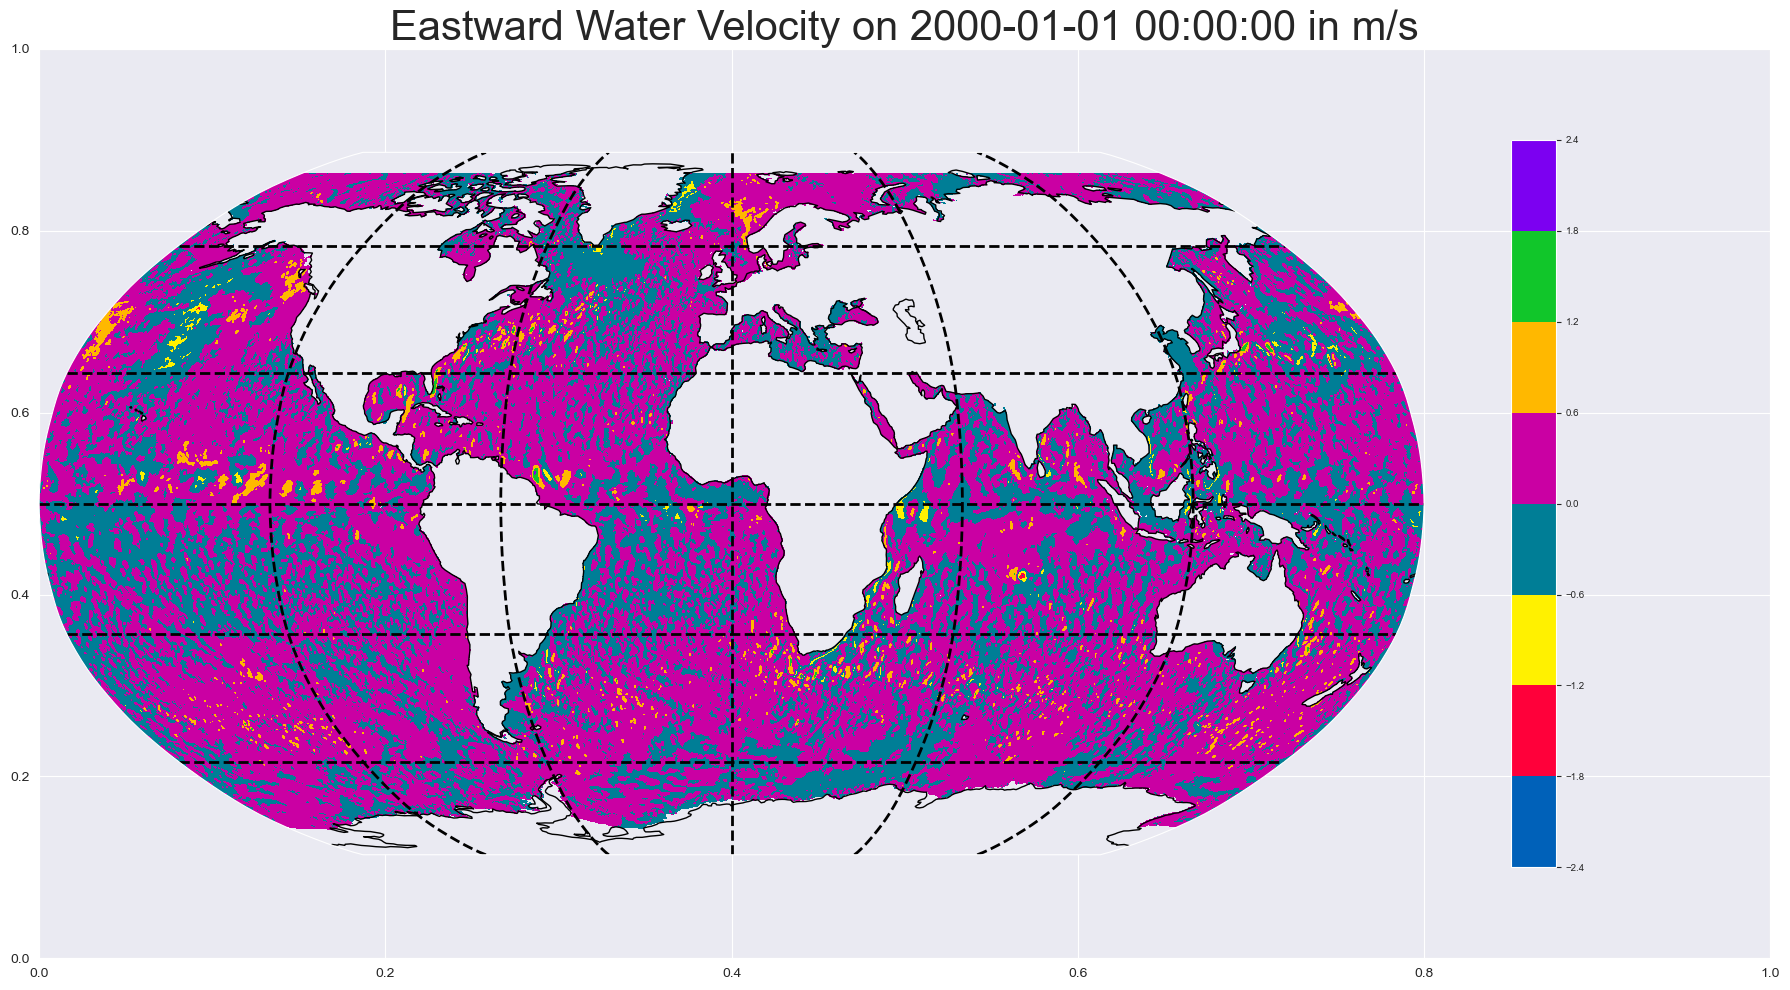

In [71]:
plot_map(data_water_v, "Eastward Water Velocity on 2000-01-01 00:00:00 in m/s", cmap="prism")

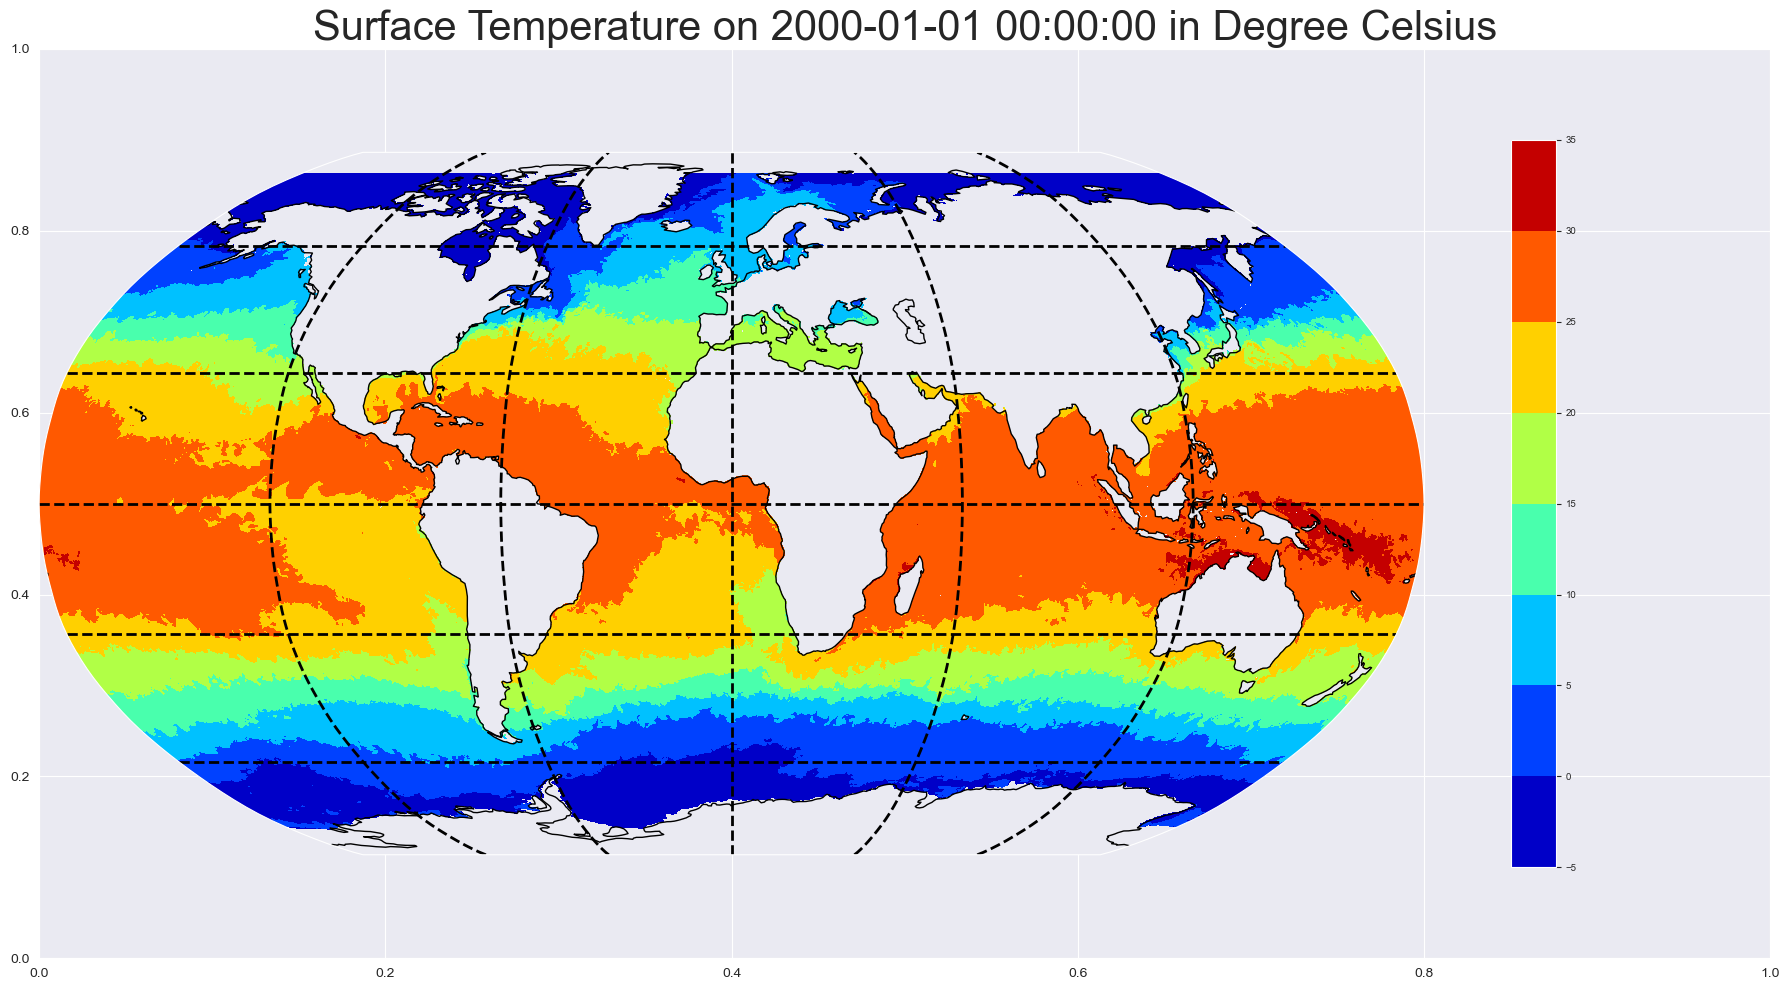

In [72]:
plot_map(data_water_temp, "Surface Temperature on 2000-01-01 00:00:00 in Degree Celsius", cmap="jet")

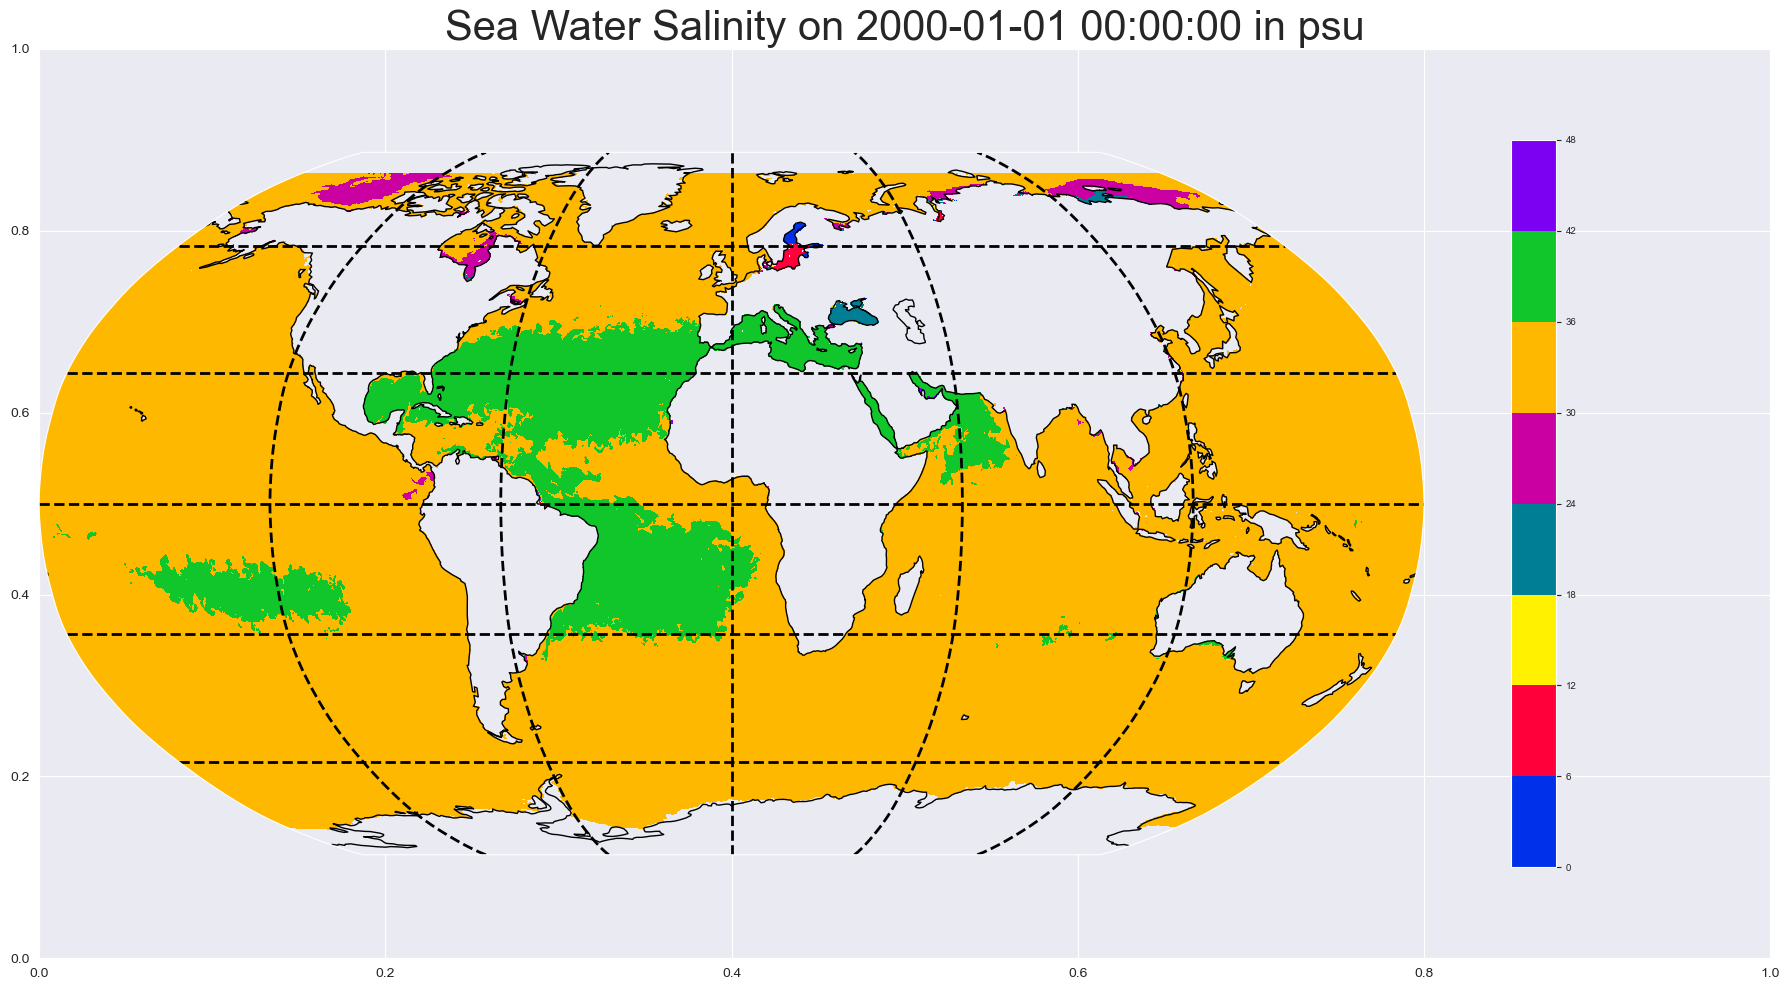

In [73]:
plot_map(data_salinity, "Sea Water Salinity on 2000-01-01 00:00:00 in psu", cmap="prism")

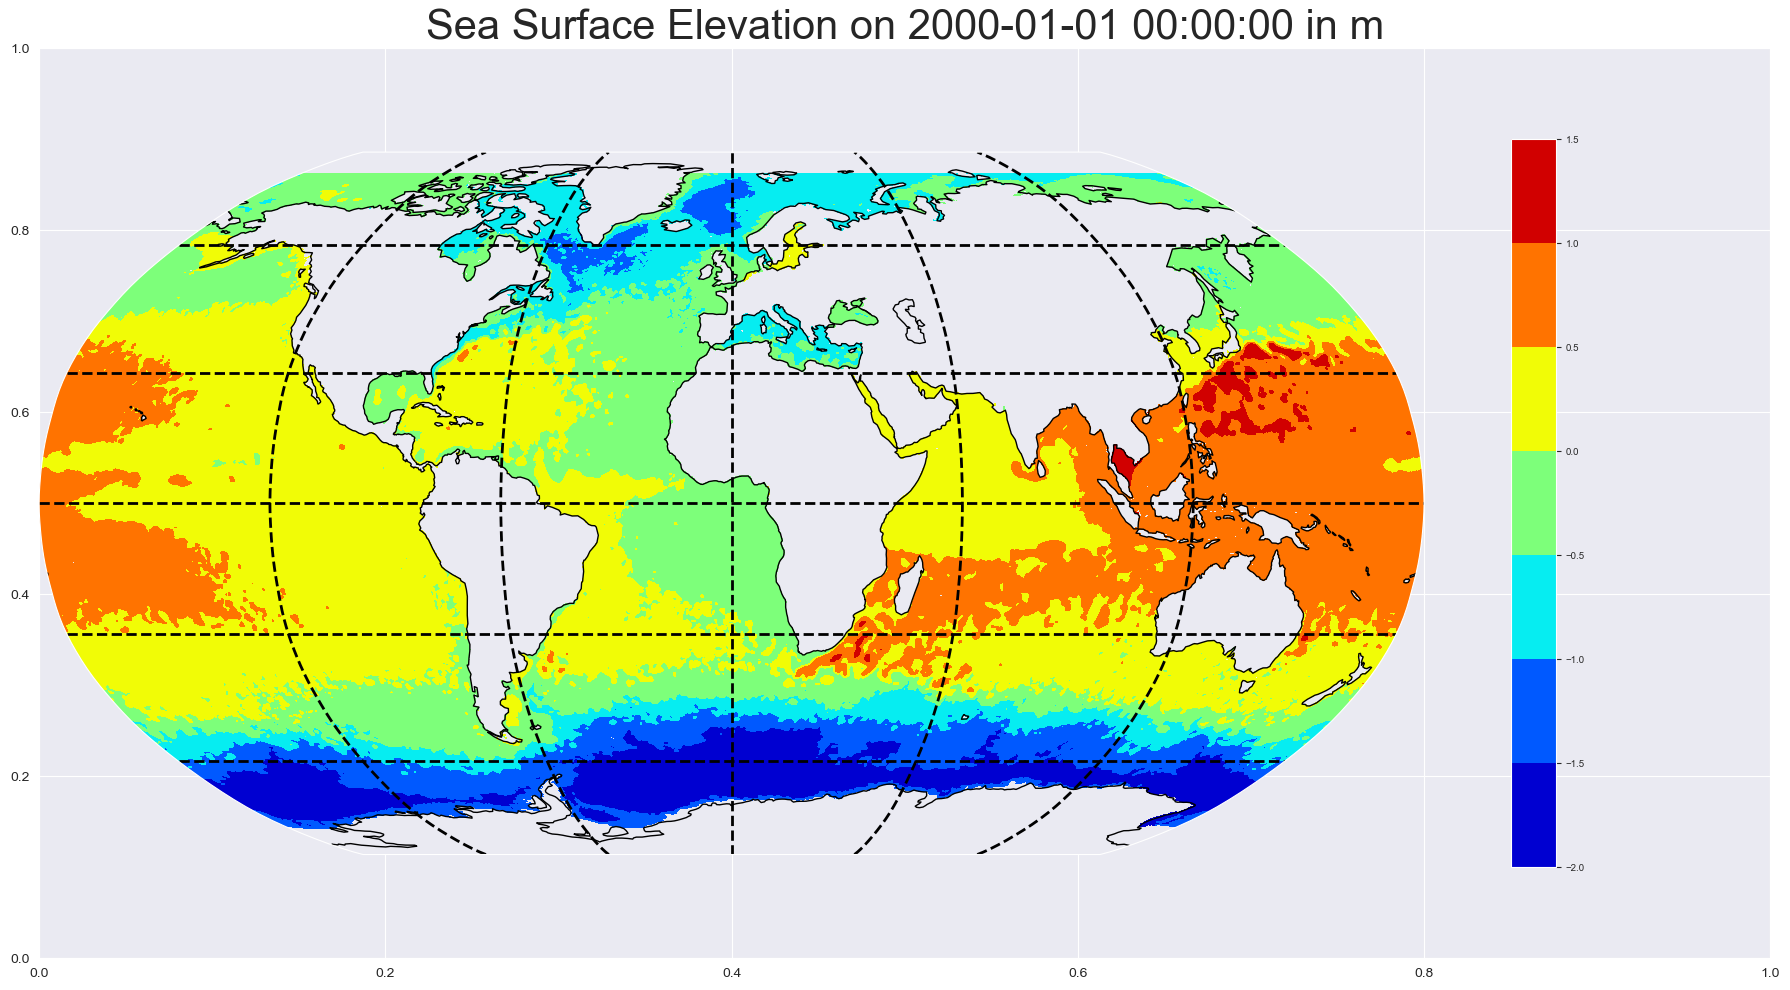

In [74]:
plot_map(data_surf_el, "Sea Surface Elevation on 2000-01-01 00:00:00 in m", cmap="jet")

# What are the next steps?
* Clustering?
* 3D-Animation?
* Data cleaning / preprocessing?